## Introduction to Databases

### Plotting Graphs 

In [1]:
#!pip install pydotplus
#!pip install graphviz

In [2]:
import io
from itertools import count
import pydotplus
import pandas as pd

import networkx as nx
from networkx import Graph as NXGraph
from networkx.drawing.nx_agraph import graphviz_layout

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import collections

from IPython.display import display, Image

In [3]:
df = pd.read_excel('../SampleDBs/ACDH_CH_WG4_simplified.xls')
df.loc[0,'Superclass(es)'] = 'owl:Thing'
df.head(10)

,Entity,Type,Superclass(es),based_near,knows,member,topic_interest,hasProject
0,owl:Thing,Class,owl:Thing,NaN,NaN,NaN,NaN,NaN
1,Agent,Class,owl:Thing,NaN,NaN,NaN,NaN,NaN
2,Group,Class,Agent,NaN,NaN,NaN,NaN,NaN
3,Organization,Class,Agent,NaN,NaN,NaN,NaN,NaN
4,Project,Class,owl:Thing,NaN,NaN,NaN,NaN,NaN
5,ACDH-CH,Class,Organization,NaN,NaN,NaN,NaN,NaN
6,APIS,Class,Project,NaN,NaN,NaN,NaN,NaN
7,Amelie_Dorn,Class,Person,Wohllebengasse,NaN,WG4,"Languages,Foreign_Languages,Education,Linguistics","PROVIDEDH,Chia"
8,Applied_Humanities,Class,Topics_Interest,NaN,NaN,NaN,NaN,NaN
9,Archaeology,Class,Topics_Interest,NaN,NaN,NaN,NaN,NaN


In [4]:
#possible colors' names
mcolors.cnames.keys()

dict_keys(['aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure', 'beige', 'bisque', 'black', 'blanchedalmond', 'blue', 'blueviolet', 'brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson', 'cyan', 'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgray', 'darkgreen', 'darkgrey', 'darkkhaki', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkorchid', 'darkred', 'darksalmon', 'darkseagreen', 'darkslateblue', 'darkslategray', 'darkslategrey', 'darkturquoise', 'darkviolet', 'deeppink', 'deepskyblue', 'dimgray', 'dimgrey', 'dodgerblue', 'firebrick', 'floralwhite', 'forestgreen', 'fuchsia', 'gainsboro', 'ghostwhite', 'gold', 'goldenrod', 'gray', 'green', 'greenyellow', 'grey', 'honeydew', 'hotpink', 'indianred', 'indigo', 'ivory', 'khaki', 'lavender', 'lavenderblush', 'lawngreen', 'lemonchiffon', 'lightblue', 'lightcoral', 'lightcyan', 'lightgoldenrodyellow', 'lightgray', 'lightgreen', 'lightgrey', 'lightpink', 'lightsalmon', 'lights

In [5]:
## number of classes
len(df['Superclass(es)'].unique())

15

In [6]:
## one color for each class

chosen = ['aliceblue', 
          'antiquewhite',
          'aquamarine', 
          'azure', 
          'beige', 
          'bisque', 
          'pink', 
          'blanchedalmond', 
          'lightskyblue', 
          'lightcoral', 
          'brown', 
          'burlywood', 
          'cadetblue', 
          'coral', 
          'cornflowerblue']

colors = dict(zip(df['Superclass(es)'].unique(),chosen))
df_colors = pd.DataFrame({'classes':df['Superclass(es)'].unique(), 'colors':chosen})
df_colors.head(15)

,classes,colors
0,owl:Thing,aliceblue
1,Agent,antiquewhite
2,Organization,aquamarine
3,Project,azure
4,Person,beige
5,Topics_Interest,bisque
6,Computer_and_Information_Science,pink
7,Linguistics,blanchedalmond
8,Languages,lightskyblue
9,Location,lightcoral


In [7]:
#create graph
G = nx.DiGraph()
#add nodes
for idx in df.index:
    G.add_node(df.loc[idx,'Entity'], color=colors[df.loc[idx,'Superclass(es)']])
#add edges class-subclass    
G.add_edges_from(zip(df['Entity'].values, df['Superclass(es)'].values),
                 color='turquoise',
                 relation = 'is a')

#add edges 'based near'
df2 = df.dropna(axis=0, subset=['based_near'])
for idx in df2.index:
    for base in df2.loc[idx,'based_near'].split(','):
        G.add_edge(df2.loc[idx,'Entity'], base,
                   color='violet', 
                   relation='based near')

#add edges 'member'
df2 = df.dropna(axis=0, subset=['member'])
for idx in df2.index:
    for member in df2.loc[idx,'member'].split(','):
        G.add_edge(df2.loc[idx,'Entity'], member,
                   color='peachpuff', 
                   relation='member')
        
#add edges 'topic_interest'
df2 = df.dropna(axis=0, subset=['topic_interest'])
for idx in df2.index:
    for topic in df2.loc[idx,'topic_interest'].split(','):
        G.add_edge(df2.loc[idx,'Entity'], topic,
                   color='steelblue', 
                   relation='topic_interest')

#add edges 'hasProject'
df2 = df.dropna(axis=0, subset=['hasProject'])
for idx in df2.index:
    for project in df2.loc[idx,'hasProject'].split(','):
        G.add_edge(df2.loc[idx,'Entity'], project,
                   color='plum', 
                   relation='hasProject')

In [8]:
for node in G.nodes(data=True):
    print(node)
    break
for edge in G.edges(data=True):
    print(edge)
    break

('owl:Thing', {'color': 'aliceblue'})
('owl:Thing', 'owl:Thing', {'color': 'turquoise', 'relation': 'is a'})


ImportError: ('requires pygraphviz ', 'http://pygraphviz.github.io/')

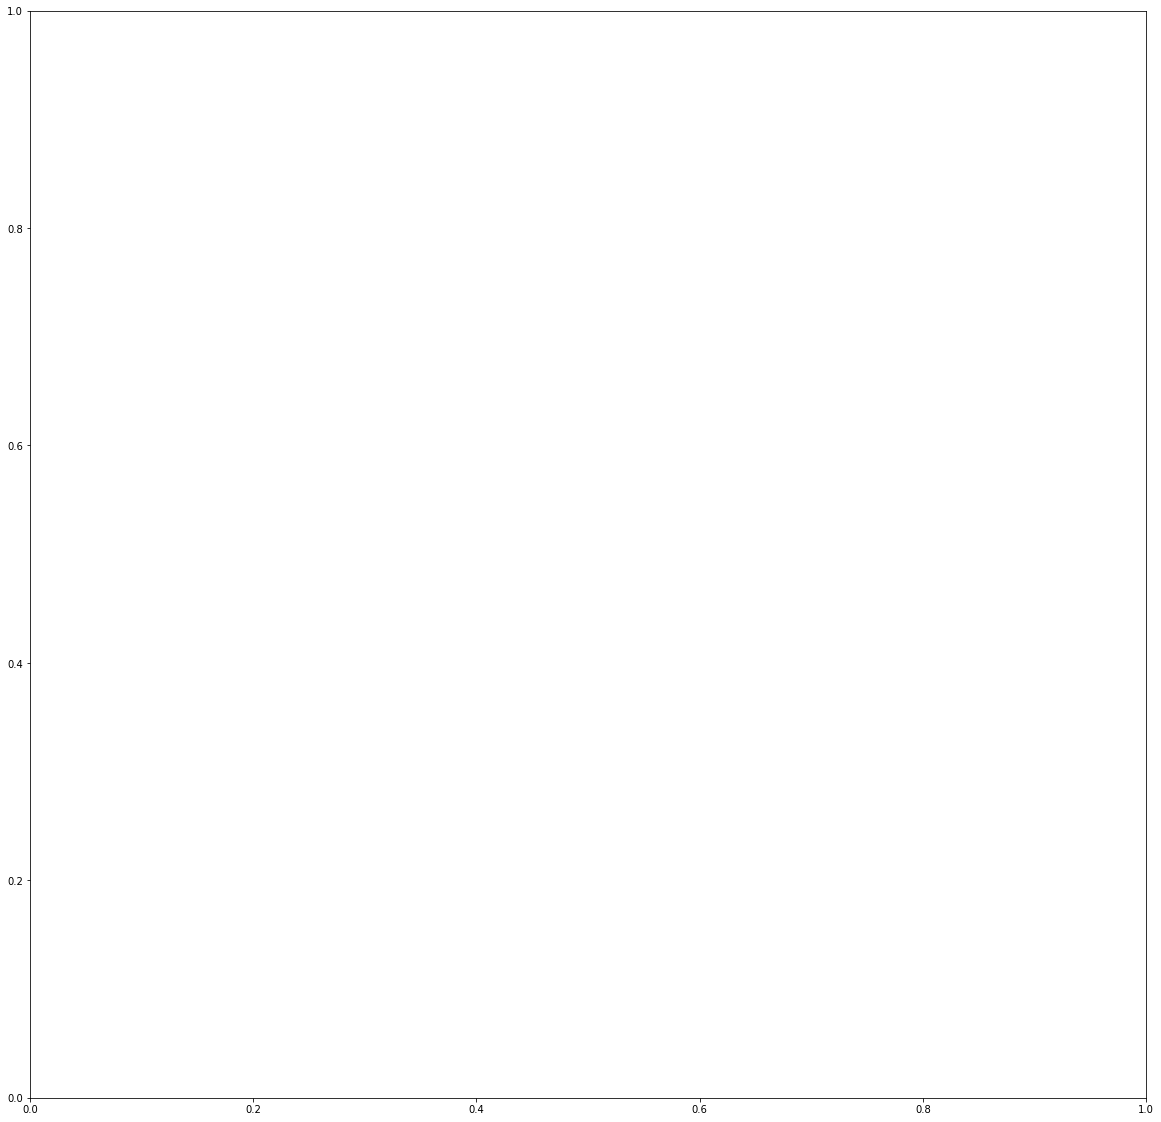

In [9]:
#plt.figure(figsize=(20,20))
fig, ax = plt.subplots(figsize=(20,20))

## https://stackoverflow.com/questions/21978487/improving-python-networkx-graph-layout
pos = graphviz_layout(G, prog='neato', args='') 
#pos = nx.spring_layout(G, scale=1)

## https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html
nx.draw_networkx_edge_labels(G, 
                             pos, 
                             edge_labels=nx.get_edge_attributes(G,'relation'),
                             label_pos=0.5, 
                             font_size=9, 
                             font_color='red', 
                             font_family='sans-serif', 
                             font_weight='normal', 
                             alpha=1.0, 
                             bbox=None, 
                             ax=ax, 
                             rotate=True,)

nx.draw_networkx(G, 
                 pos=pos, 
                 arrows=True,
                 with_labels=True,
                 ax=ax,
                 nodelist=G.nodes(),
                 edgelist=G.edges(),
                 node_size=700,
                 node_color=[nx.get_node_attributes(G,'color')[g] for g in G.nodes()],
                 node_shape='o',
                 alpha=1.0,
                 cmap=None,
                 vmin=None,
                 vmax=None,
                 linewidths=1.0,
                 width=1.0,
                 edge_color=[nx.get_edge_attributes(G,'color')[g] for g in G.edges()],
                 edge_cmap=None,
                 edge_vmin=None,
                 edge_vmax=None,
                 style='solid',
                 labels=None ,
                 font_size=10,
                 font_color='blue',
                 font_weight='normal',
                 font_family='sans-serif',
                 label='ACDH-CH WG4 Graph',)


## https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html
plt.savefig("../fig/WG4_Graph.jpg", format="jpg", dpi=100)
plt.show()